# 资本资产定价模型与套利定价理论
by Beha Abasi, Maxwell Margenot, and Delaney Granizo-Mackenzie

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [https://github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---

资本资产定价模型(CAPM)是衡量资本成本的经典方法。它经常被用于金融评估资产的价格和评估风险溢价的影响从整个市场。在这一讲中，我们将讨论CAPM，即更一般的套利定价理论(APT)，以形成评估与各种因素相关的风险的基础。

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt

## 个体和系统性风险

一般来说，投资组合和资产可能面临两种风险:特殊风险和系统风险。**非系统性风险**是指企业特有的、可以分散的风险，如管理变更或生产缺陷，而**系统风险**是市场范围内的，影响所有市场参与者。一个例子可能是经济放缓或利率变化。因为所有的公司都面临着系统风险，它不可能多样化。

## 风险溢价

随着投资组合中资产数量的增加，许多特殊风险被抵消并分散。这是我们希望避免[仓位集中风险](https://www.quantopian.com/lectures/position-concentration-risk)的关键原因。当你的投资组合越来越大，并通过多样化进行更多的独立投资时，投资组合的方差会下降，直到只剩下系统风险。由于我们无法消除系统性风险，投资者必须获得高于无风险回报率的风险溢价，以补偿他们通过投资于这种投资组合所承担的风险。这个投资组合中的单个公司层面的风险没有相关的溢价，因为这会创造套利机会。股东可以收取风险溢价，同时分散与他们相关的风险。这将意味着没有任何额外风险敞口的额外利润。这就是套利机会的定义!

从这个推理中，我们可以得出这样的结论:一种资产的溢价应该与它的特殊风险无关，而应该完全依赖于它所承担的系统风险水平。为了准确计算一项资产的风险溢价，从而计算出我们的预期收益，我们需要找到一种衡量系统风险的方法。如果我们有，那么我们可以从理论上定义资产的回报如下:

$$E[\mbox{回报率}] = \mbox{无风险回报率} + \mbox{风险溢价}$$

一种方法是估计一项资产超额回报的变化与市场超额回报的变化之间的关系。将其表示为线性回归，我们得到了市场组合收益率每变化1%，资产预期收益率变化的关系。

理论上，这个市场组合应该没有可分散的风险，因此只会随着系统冲击而波动。在实践中，我们使用市场指数，如标准普尔500指数作为市场投资组合的代理。我们用市场回报率来回归资产回报率所得到的贝塔值，将是衡量系统性风险的指标。这个贝塔系数代表了资产回报流对市场震荡的敏感性。

给定此beta，资产$i$的风险溢价定义为:

$$\mbox{资产的风险溢价}_i = \beta\times (\mbox{市场风险溢价})$$

我们把这个简单的模型称为资本资产定价模型(CAPM)。

## 资本资产定价理论

我们可以将CAPM表达得更清楚，如下:

$$E[R_i] = R_F + \beta(E[R_M] - R_F)$$

其中$R_i$为资产$i$的收益率，$R_F$为无风险利率，$R_M$为市场收益率。资本资产定价机制是衡量资本成本最基本的指标之一。它决定了吸引投资者持有某种资产所需的最低回报率。

换句话说,CAPM说资产的回报应该是无风险利率,这是我们需要考虑到通货膨胀和货币的时间价值,以及一些额外的补偿我们的系统性风险暴露。

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     59.42
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           3.04e-13
Time:                        23:20:10   Log-Likelihood:                 749.52
No. Observations:                 251   AIC:                            -1495.
Df Residuals:                     249   BIC:                            -1488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.333      0.184      -0.000       0.003
SPYL           0.8430      0.109      7.708      0.000       0.628       1.058
==============================================================================
Omnibus:                       75.701   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2562.212
Skew:                          -0.336   Prob(JB):                         0.00
Kurtosis:                      18.638   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

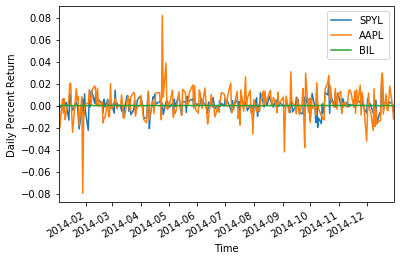

In [2]:
import yfinance as yf

start_date = '2014-01-01'
end_date = '2014-12-31'

# choose stock
R = yf.download('AAPL',  start_date, end_date)['Close'].pct_change()[1:]
R.name='AAPL'

# risk-free proxy
R_F = yf.download('BIL',  start_date, end_date)['Close'].pct_change()[1:]
R_F.name='BIL'

# find it's beta against market
M = yf.download('SPY',  start_date, end_date)['Close'].pct_change()[1:]
M.name='SPYL'

AAPL_results = regression.linear_model.OLS(R-R_F, sm.add_constant(M)).fit()
AAPL_beta = AAPL_results.params[1]

M.plot()
R.plot()
R_F.plot()
plt.xlabel('Time')
plt.ylabel('Daily Percent Return')
plt.legend();

AAPL_results.summary()

然后，我们可以利用计算出的贝塔风险来预测回报。

D:\Anaconda3\lib\site-packages\IPython\core\events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


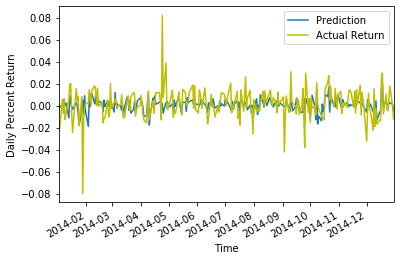

In [3]:
predictions = R_F + AAPL_beta*(M - R_F) # CAPM equation

predictions.plot()
R.plot(color='Y')
plt.legend(['Prediction', 'Actual Return'])

plt.xlabel('Time')
plt.ylabel('Daily Percent Return');

## CAPM的假设

在CAPM的推导过程中，我们做了两个主要的假设:
* 我们假设投资者能够在没有延迟或成本的情况下进行交易，并且每个人都能够以无风险利率借贷资金。
* 我们假设所有的投资者都是“均值方差优化者”。这实际上意味着，他们只会要求在给定风险水平下能够获得最高回报的投资组合。这些投资组合都是沿着**有效边界**找到的。

以下是四个资产组合的有效边界的程序化推导。

In [3]:
from scipy import optimize
import cvxopt as opt
from cvxopt import blas, solvers

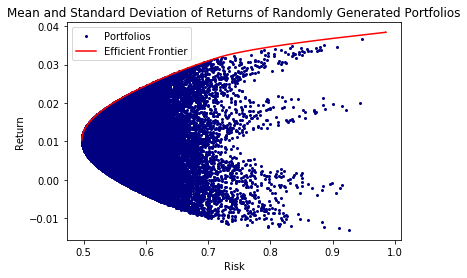

In [4]:
np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

# Number of assets
n_assets = 4

# Number of observations
n_obs = 2000

## Generating random returns for our 4 securities
return_vec = np.random.randn(n_assets, n_obs)

def rand_weights(n):
    ''' 
    Produces n random weights that sum to 1 
    '''
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

def optimal_portfolios(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100000
    
    # Creating a list of returns to optimize the risk for
    mus = [100**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    
    ## Calculate the risk and returns of the frontier
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    return returns, risks

n_portfolios = 50000

means, stds = np.column_stack([random_portfolio(return_vec) for x in range(n_portfolios)])

returns, risks = optimal_portfolios(return_vec)

plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Mean and Standard Deviation of Returns of Randomly Generated Portfolios');

plt.plot(risks, returns, '-', markersize=3, color='red');
plt.legend(['Portfolios', 'Efficient Frontier']);

每个蓝点代表一个不同的投资组合，而掠过边界的红线则是有效边界。有效边界包含在给定风险水平下最佳的所有投资组合。

这条线上的最优或最有效的投资组合是通过最大化夏普比率，即超额收益和波动性的比率来找到的。我们用它来确定最佳风险回报权衡的投资组合。

代表无风险资产与风险资产组合的不同组合的线称为资本配置线(CAL)。CAL的斜率是夏普比率。为了使夏普比率最大化，我们需要找到最陡的点，它与与有效边界相切的点重合。这就是为什么有效投资组合有时被称为切线投资组合的原因。

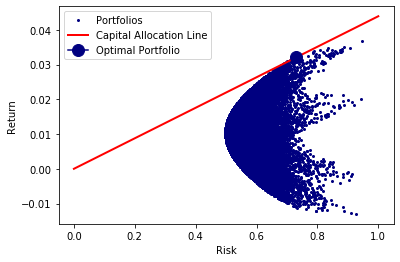

In [6]:
def maximize_sharpe_ratio(return_vec, risk_free_rate):
    """
    Finds the CAPM optimal portfolio from the efficient frontier 
    by optimizing the Sharpe ratio.
    """
    
    def find_sharpe(weights):
        
        means = [np.mean(asset) for asset in return_vec]
        
        numerator = sum(weights[m]*means[m] for m in range(len(means))) - risk_free_rate
        
        weight = np.array(weights)
        
        denominator = np.sqrt(weights.T.dot(np.corrcoef(return_vec).dot(weights)))
        
        return numerator/denominator
    
    guess = np.ones(len(return_vec)) / len(return_vec)
    
    def objective(weights):
        return -find_sharpe(weights)
    
    # Set up equality constrained
    cons = {'type':'eq', 'fun': lambda x: np.sum(np.abs(x)) - 1} 

    # Set up bounds for individual weights
    bnds = [(0, 1)] * len(return_vec)
    
    results = optimize.minimize(objective, guess,
                            constraints=cons, bounds=bnds, 
                            method='SLSQP', options={'disp': False})
    
    return results

risk_free_rate = np.mean(R_F)

results = maximize_sharpe_ratio(return_vec, risk_free_rate)

# Applying the optimal weights to each assset to get build portfolio
optimal_mean = sum(results.x[i]*np.mean(return_vec[i]) for i in range(len(results.x)))

optimal_std = np.sqrt(results.x.T.dot(np.corrcoef(return_vec).dot(results.x)))

# Plot of all possible portfolios
plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.ylabel('Return')
plt.xlabel('Risk')

# Line from the risk-free rate to the optimal portfolio
eqn_of_the_line = lambda x : ( (optimal_mean-risk_free_rate) / optimal_std ) * x + risk_free_rate    

xrange = np.linspace(0., 1., num=11)

plt.plot(xrange, [eqn_of_the_line(x) for x in xrange], color='red', linestyle='-', linewidth=2)

# Our optimal portfolio
plt.plot([optimal_std], [optimal_mean], marker='o', markersize=12, color="navy")

plt.legend(['Portfolios', 'Capital Allocation Line', 'Optimal Portfolio']);

我们可以将单个资产的回报和风险与我们找到的最优投资组合进行比较，从而很容易地展示出多样化的力量。

In [10]:
for a in range(len(return_vec)): 
    print ("Return and Risk of Asset", a, ":", np.mean(return_vec[a]), ",",np.std(return_vec[a]))   
    
print("Return and Risk of Optimal Portfolio", optimal_mean, optimal_std) 

Return and Risk of Asset 0 : -0.015587484342459114 , 0.9799254468194947
Return and Risk of Asset 1 : 0.03841588871479547 , 0.9856584032986271
Return and Risk of Asset 2 : 0.02064673779922475 , 0.9919497385814913
Return and Risk of Asset 3 : -0.0044368654765103805 , 1.003119682183738
Return and Risk of Optimal Portfolio 0.03211266679689679 0.7311280492268122


# 资本市场线是通过市场组合计算的

我们的最优投资组合有一个体面的高回报和更少的风险，比任何单个资产，如预期。理论上，所有投资者都应该要求这种最佳的、相切的投资组合。如果我们累积所有投资者的投资组合，我们最终得到的是市场投资组合，因为所有的股票都必须有人持有。这意味着切线投资组合是市场投资组合，也就是说需求必须等于供给。

当无风险资产被添加到投资组合中时，资本资产线就变成了资本市场线(CML)。根据CAPM，任何位于CML右侧的股票或投资组合都将包含可分散风险，因此是无效的。

每种证券的beta与预期收益的映射结果在证券市场线中。证券回报与CAPM预测的预期回报之间的差异称为alpha。

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


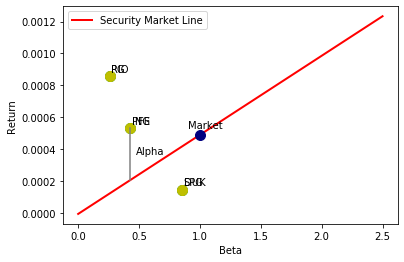

In [7]:
import yfinance as yf

risk_free_rate = np.mean(R_F)

# We have two coordinates that we use to map the SML: (0, risk-free rate) and (1, market return)

eqn_of_the_line = lambda x : ( (np.mean(M)-risk_free_rate) / 1.0) * x + risk_free_rate        
xrange = np.linspace(0., 2.5, num=2)
plt.plot(xrange, [eqn_of_the_line(x) for x in xrange], color='red', linestyle='-', linewidth=2)

plt.plot([1], [np.mean(M)], marker='o', color='navy', markersize=10)
plt.annotate('Market', xy=(1, np.mean(M)), xytext=(0.9, np.mean(M)+0.00004))

# Next, we will compare to see whether stocks in more cyclical industries have higher betas
# Of course, a more thorough analysis is required to rigorously answer this question

# Non-Cyclical Industry Stocks
non_cyclical = ['PG', 'DUK', 'PFE']
non_cyclical_returns = yf.download(
    non_cyclical,
    start_date,
    end_date
)['Close'].pct_change()[1:]
non_cyclical_returns.columns =non_cyclical

non_cyclical_betas = [
    regression.linear_model.OLS(
        non_cyclical_returns[asset],
        sm.add_constant(M)
    ).fit().params[1]
     for asset in non_cyclical
]

for asset, beta in zip(non_cyclical, non_cyclical_betas):
    plt.plot([beta], [np.mean(non_cyclical_returns[asset])], marker='o', color='g', markersize=10)
    plt.annotate(
        asset,
        xy=(beta, np.mean(non_cyclical_returns[asset])),
        xytext=(beta + 0.015, np.mean(non_cyclical_returns[asset]) + 0.000025)
    )

# Cyclical Industry Stocks
cyclical = ['RIO', 'SPG', 'ING']
cyclical_returns = yf.download(
    non_cyclical,
    start_date,
    end_date
)['Close'].pct_change()[1:]
cyclical_returns.columns = cyclical

cyclical_betas = [
    regression.linear_model.OLS(
        cyclical_returns[asset],
        sm.add_constant(M)
    ).fit().params[1]
     for asset in cyclical
]

for asset, beta in zip(cyclical, cyclical_betas):
    plt.plot([beta], [np.mean(cyclical_returns[asset])], marker='o', color='y', markersize=10)
    plt.annotate(
        asset,
        xy=(beta, np.mean(cyclical_returns[asset])),
        xytext=(beta + 0.015, np.mean(cyclical_returns[asset]) + 0.000025)
    )

# drawing the alpha, which is the difference between expected return and the actual return
plt.plot(
    [cyclical_betas[2], cyclical_betas[2]],
    [np.mean(cyclical_returns.iloc[:, 2]), eqn_of_the_line(cyclical_betas[2])],
    color='grey'
)
plt.annotate(
    'Alpha',
    xy=(
        cyclical_betas[2] + 0.05,
        (eqn_of_the_line(cyclical_betas[2])-np.mean(cyclical_returns.iloc[:,2]))/2+np.mean(cyclical_returns.iloc[:,2])
    ),
    xytext=(
        cyclical_betas[2] + 0.05,
        (eqn_of_the_line(cyclical_betas[2])-np.mean(cyclical_returns.iloc[:,2]))/2+np.mean(cyclical_returns.iloc[:,2])
    )
)

plt.xlabel("Beta")
plt.ylabel("Return")

plt.legend(['Security Market Line']);

有关CAPM的更多信息，请查看[wikipedia页面](https://en.wikipedia.org/wiki/Capital_asset_pricing_model).

# 套利定价理论

CAPM虽然得到了广泛的应用和研究，但也存在许多不足之处。由于有严格的、限制性的假设，它在经验测试中并不适用。套利定价理论(Arbitrage Pricing Theory, APT)旨在推广CAPM模型，因为资产可能暴露于市场风险以外的风险类别，投资者关心的可能不仅仅是均值和方差。

APT是一种主要的资产定价理论，它依赖于使用线性因子模型来表达收益:

$$R_i = a_i + b_{i1} F_1 + b_{i2} F_2 + \ldots + b_{iK} F_K + \epsilon_i$$

因素是完全由某些特性决定的返回流。例如，资本资产定价机制只有一个因素，市场回报。如我们已按上述方法建立回报率模型，预期回报率应以下列形式计算:

$$ E(R_i) = R_F + b_{i1} \lambda_1 + b_{i2} \lambda_2 + \ldots + b_{iK} \lambda_K $$

其中$R_F$是无风险利率，$\lambda_j$是因子$j$的风险溢价—收益超过无风险利率。这种溢价的产生是因为投资者需要更高的回报来补偿他们所承担的更高的风险。

我们将用Fama-Macbeth回归计算我们的因素的风险溢价。但是，有多种方法可以计算每个$\lambda_j$!

## 套利

既然我们已经有了一个合理的计算预期收益的一般方法，我们就可以更专业地讨论套利了。在我们的宇宙中有很多很多的证券。如果我们使用不同的方法来计算$\{\lambda_i\}$，我们的结果会是一致的吗?如果我们的结果不一致，就会有*套利机会*(在预期中)，即在不产生风险的情况下获得利润，也没有资金的净投资。在这种情况下，我们的意思是有一个无风险的操作，有*预期*正回报，不需要净投资。它发生在回报预期不一致的时候，也就是风险在不同证券之间的定价不一致的时候。

假设有一种资产下一年的预期收益率为0.2，市场的$\beta$为1.2，而市场的预期收益率为0.1,1年期债券的无风险利率为0.05。那么APT模型告诉我们，资产的预期收益率应该是

$$ R_F + \beta \lambda = 0.05 + 1.2 (0.1 - 0.05) = 0.11$$

这与资产回报率为0.2的预测不一致。因此，如果我们买入100份资产，做空120份市场，并买入20份债券，我们将不会投入任何净资金，也不会面临任何系统性风险(我们是市场中性的)，但我们预计年底将赚得0.2(100)- 0.1(120)+ 0.05(20)= 9美元。

APT认为，在价格发生变化、套利机会消失之前，这些机会将被利用。也就是说，它假定存在有足够耐心和资本的套利者。这为在证券定价中使用经验因素模型提供了一个理由:如果模型不一致，就会有套利机会，因此价格会调整。

## 双向的

准确地知道$E(R_i)$是非常困难的，但是这个模型告诉我们，如果市场没有套利的话，预期收益应该是多少。这为基于因子模型排序系统的策略奠定了基础。如果您有一个资产预期回报的模型，那么您可以根据这些资产的预期表现对它们进行排序，并使用这些信息进行交易。这一排名机制的创建，是[多空股票战略](https://www.quantopian.com/lectures/long-short-equity)的标志。

## 检验套利定价理论

APT的大多数经验测试分两个步骤进行:估计单个因素的贝塔系数，然后将其与实际价格进行比较，看看预测结果如何。

在这里，我们将使用基于各种微观经济指标构建的多空股票策略的回报流作为我们的因素。然后，我们将使用Fama-Macbeth回归方法来估计我们的风险溢价。

In [ ]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import Fundamentals
from quantopian.pipeline.factors import Returns, Latest
from quantopian.pipeline.filters import Q1500US
from quantopian.research import run_pipeline
from quantopian.pipeline.classifiers.fundamentals import Sector
import itertools

现在我们使用Pipeline来获取所有的数据。

In [ ]:
def make_pipeline():
    
    pipe = Pipeline()

    # Add our factors to the pipeline
    purchase_of_biz = Latest([Fundamentals.purchase_of_business])
    pipe.add(purchase_of_biz, 'purchase_of_business')
    
    RD = Latest([Fundamentals.research_and_development])
    pipe.add(RD, 'RD')
    
    operating_cash_flow = Latest([Fundamentals.operating_cash_flow])
    pipe.add(operating_cash_flow, 'operating_cash_flow')
    
    # Create factor rankings and add to pipeline
    purchase_of_biz_rank = purchase_of_biz.rank()
    RD_rank = RD.rank()
    operating_cash_flow_rank = operating_cash_flow.rank()

    pipe.add(purchase_of_biz_rank, 'purchase_of_biz_rank')
    pipe.add(RD_rank, 'RD_rank')
    pipe.add(operating_cash_flow_rank, 'operating_cash_flow_rank')
    
    most_biz_bought = purchase_of_biz_rank.top(1000)
    least_biz_bought = purchase_of_biz_rank.bottom(1000)
    
    most_RD = RD_rank.top(1000)
    least_RD = RD_rank.bottom(1000)
    
    most_cash = operating_cash_flow_rank.top(1000)
    least_cash = operating_cash_flow_rank.bottom(1000)
    
    pipe.add(most_biz_bought, 'most_biz_bought')
    pipe.add(least_biz_bought, 'least_biz_bought')
    
    pipe.add(most_RD, 'most_RD')
    pipe.add(least_RD, 'least_RD')
    
    pipe.add(most_cash, 'most_cash')
    pipe.add(least_cash, 'least_cash')
    
    # We also get daily returns
    returns = Returns(window_length=2)
    
    # and sector types
    sectors = Sector()

    pipe.add(returns, "Returns")
    
    # We will focus on technology stocks in the Q1500
    pipe.set_screen(
        (Q1500US() & sectors.eq(311)) & 
        most_biz_bought | least_biz_bought | 
        most_RD | least_RD |
        most_cash | least_cash
    )
    
    return pipe

pipe = make_pipeline()
results = run_pipeline(pipe, start_date, end_date)

results.head()

为了得到我们的要素回报流，我们根据他们对企业的购买、他们的研发支出和他们的现金流对股票进行排名。然后，对于每个指标，我们做多最高百分位数的资产，做空最低百分位数的资产。

In [ ]:
most_biz_bought = results[results.most_biz_bought]['Returns'].groupby(level=0).mean()
least_biz_bought = results[results.least_biz_bought]['Returns'].groupby(level=0).mean()

most_RD = results[results.most_RD]['Returns'].groupby(level=0).mean()
least_RD = results[results.least_RD]['Returns'].groupby(level=0).mean()

most_cash = results[results.most_cash]['Returns'].groupby(level=0).mean()
least_cash = results[results.least_cash]['Returns'].groupby(level=0).mean()

# Calculating our factor return streams
biz_purchase_portfolio = most_biz_bought - least_biz_bought
RD_portfolio = most_RD - least_RD
cash_flow_portfolio = most_cash - least_cash

最后，我们将把所有的东西放在一起进行Fama-Macbeth回归。这需要两个步骤。

首先，对于每一种资产，我们都要回归它在每个要素回报流中的回报:

$$R_{1, t} = \alpha_1 + \beta_{1, F_1}F_{1, t} + \beta_{1, F_2}F_{2, t} + \dots + \beta_{1, F_m}F_{m, t} + \epsilon_{1, t} \\
R_{2, t} = \alpha_2 + \beta_{2, F_1}F_{1, t} + \beta_{2, F_2}F_{2, t} + \dots + \beta_{2, F_m}F_{m, t} + \epsilon_{2, t} \\
\vdots \\
R_{n, t} = \alpha_n + \beta_{n, F_1}F_{1, t} + \beta_{n, F_2}F_{2, t} + \dots + \beta_{n, F_m}F_{m, t} + \epsilon_{n, t}$$

其次，我们从第一步中得到贝塔估计值，并将其作为外生变量来估计每种资产的平均回报率。这一步是计算我们的风险溢价，$\{\gamma_K\}$。

$$E(R_i) = \gamma_0 + \gamma_1 \hat{\beta}_{i, F_1} + \gamma_2 \hat{\beta}_{i, F_2} + \dots + \gamma_m \hat{\beta}_{i, F_m} + \epsilon_i$$

In [ ]:
# putting all of our data from pipeline into a DataFrame for convenience
# we'll have to first do some data manipulating since our factor return streams are date specific,
# but our asset returns are both date and asset specific

data = results[['Returns']].set_index(results.index)
asset_list_sizes = [group[1].size for group in data.groupby(level=0)]

purchase_of_biz_column = [
    [biz_purchase_portfolio.loc[group[0]]] * size
     for group, size in zip(data.groupby(level=0), asset_list_sizes)
]
data['Purchase of Business'] = list(itertools.chain(*purchase_of_biz_column))

RD_column = [
    [RD_portfolio.loc[group[0]]] * size
     for group, size in zip(data.groupby(level=0), asset_list_sizes)
]
data['RD'] = list(itertools.chain(*RD_column))

cash_flow_column = [
    [cash_flow_portfolio.loc[group[0]]] * size
     for group, size in zip(data.groupby(level=0), asset_list_sizes)
]
data['Operating Cash Flow'] = list(itertools.chain(*cash_flow_column))

data = sm.add_constant(data.dropna())

# Our list of assets from pipeline
assets = data.index.levels[1].unique()

X = [data.xs(asset, level=1)['Returns'] for asset in assets] 
Y = [
    data.xs(asset, level=1)[['Purchase of Business', 'RD', 'Operating Cash Flow', 'const']]
     for asset in assets
]

# First regression step: estimating the betas
reg_results = [
    regression.linear_model.OLS(x-risk_free_rate, y).fit().params
     for x, y in zip(X, Y) if not(x.empty or y.empty)
]
indices = [asset for x, y, asset in zip(X, Y, assets) if not(x.empty or y.empty)]

betas = pd.DataFrame(reg_results, index=indices)
betas = sm.add_constant(betas.drop('const', axis=1))

R = data['Returns'].mean(axis=0, level=1)

# Second regression step: estimating the risk premia
final_results = regression.linear_model.OLS(R - risk_free_rate, betas).fit()

final_results.summary()

重要的是，我们不能只使用表面价值的模型估算。浏览一下相关的统计数据，就会对我们估计的模型的有效性有深刻的认识。例如，请注意，尽管我们的个人因素很重要，但我们有一个非常低的$R^2$。这可能表明，我们的因素和资产回报率之间确实存在联系，但仍有许多无法解释的噪音!

想要更深入地了解选择因素，请查看[因素分析讲座](https://www.quantopian.com/lectures/factor-analysis)!

In [ ]:
# smoke test for multicollinearity
print( data[['Purchase of Business', 'RD', 'Operating Cash Flow']].corr())

现在我们已经估计了我们的风险溢价，我们可以将这些与我们的贝塔估计相结合，从我们最初的回归估计资产回报。

In [ ]:
# this is our actual model!
expected_return = risk_free_rate \
    + betas['Purchase of Business']*final_results.params[1] \
    + betas['RD']*final_results.params[2] \
    + betas['Operating Cash Flow']*final_results.params[3]

year_of_returns = get_pricing(
    expected_return.index,
    start_date,
    end_date,
    fields='close_price'
).pct_change()[1:]

plt.plot(year_of_returns[expected_return.index[1]], color='purple')
plt.plot(pd.DataFrame({'Expected Return': expected_return.iloc[0]}, index=year_of_returns.index), color='red')
plt.legend(['AAPL Returns', 'APT Prediction']);

In [ ]:
# Compare AAPL prediction of CAPM vs. our APT model
M_annual_return = get_pricing('SPY', start_date=start_date, end_date=end_date, fields='price').pct_change()[1:]

# We'll take the market beta we calculated from the beginning of the lecture
CAPM_AAPL_prediction = risk_free_rate + AAPL_beta*(M_annual_return.mean() - risk_free_rate)

# Let's take a closer look
year_of_returns = year_of_returns[:25]

plt.plot(year_of_returns[expected_return.index[1]], color='purple')
plt.plot(pd.DataFrame({'Expected Return': expected_return.iloc[0]}, index=year_of_returns.index), color='red')
plt.plot(pd.DataFrame({'Expected Return': year_of_returns.mean()[0]}, index=year_of_returns.index), color='navy')
plt.plot(pd.DataFrame({'Expected Return': CAPM_AAPL_prediction}, index=year_of_returns.index), color='green')
plt.legend(['AAPL Returns', 'APT Prediction', 'AAPL Average Returns', 'CAPM Prediction']);\

最后，作为APT和CAPM的粗略比较，我们将查看使用每个模型作为排名方案构建的多空策略的回报。

In [11]:
market_betas = [
    regression.linear_model.OLS(x[1:], sm.add_constant(M_annual_return)).fit().params[1]
     for x in X if (x[1:].size == M_annual_return.size)
]
indices = [asset for x, asset in zip(X, assets) if (x[1:].size == M_annual_return.size)]

market_return = pd.DataFrame({'Market': M_annual_return.mean()}, index = indices)

CAPM_predictions = risk_free_rate + market_betas*(market_return['Market'] - risk_free_rate)
CAPM_predictions.sort_values(inplace=True, ascending=False)

CAPM_portfolio = [CAPM_predictions.head(5).index, CAPM_predictions.tail(5).index]
CAPM_long = get_pricing(
    CAPM_portfolio[0],
    start_date=start_date,
    end_date=end_date,
    fields='price'
).pct_change()[1:].mean(axis=1)
CAPM_short = get_pricing(
    CAPM_portfolio[1],
    start_date=start_date,
    end_date=end_date,
    fields='price'
).pct_change()[1:].mean(axis=1)

CAPM_returns = CAPM_long - CAPM_short

expected_return.sort_values(inplace=True, ascending=False)

APT_portfolio = [expected_return.head(5).index, expected_return.tail(5).index]
APT_long = get_pricing(
    APT_portfolio[0],
    start_date=start_date,
    end_date=end_date,
    fields='price'
).pct_change()[1:].mean(axis=1)
APT_short = get_pricing(
    APT_portfolio[1],
    start_date=start_date,
    end_date=end_date,
    fields='price'
).pct_change()[1:].mean(axis=1)

APT_returns = APT_long - APT_short

plt.plot(CAPM_returns)
plt.plot(APT_returns)
plt.plot(pd.DataFrame({'Mean Return': CAPM_returns.mean()}, index=CAPM_returns.index))
plt.plot(pd.DataFrame({'Mean Return': APT_returns.mean()}, index=APT_returns.index))
plt.legend(['CAPM Portfolio', 'APT Portfolio', 'CAPM Mean', 'APT Mean'])

print("Returns after a year: APT versus CAPM") 
print(((APT_returns[-1]/APT_returns[0]) - 1) - ((CAPM_returns[-1]/CAPM_returns[0])-1)) 

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Returns after a year: APT versus CAPM")? (<ipython-input-11-a3db8c1de117>, line 52)